In [1]:

## Import required libraries

## warnings
import warnings
warnings.filterwarnings("ignore")

## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# nlp = spacy.load('/path/to/en_core_web_lg')

## TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import en_core_web_lg



## Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV


## Feature selection
from sklearn import feature_selection

## libraraies for classification
from sklearn.pipeline import Pipeline
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


## for saving model
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\otaku7\Desktop\GP\depression\clean_data.csv",
                     sep='\t', encoding='utf-8')
     

In [3]:
df

,text,label,clean_text
0,Open discussion. Between the Transfer Portal a...,1,open discussion transfer portal nil become obs...
1,Plenty of things are changing in my life and t...,1,plenty thing changing life life around one thi...
2,I feel a little hopeless. Anyone else? #hopele...,1,feel little hopeless anyone else
3,"Which is more healthy? Hope, or hopelessness? ...",1,healthy hope hopelessness
4,So someone tell me how do I get over #HOPELESS...,1,someone tell get live world surrounded people ...
...,...,...,...
38904,"@andreaj27 well, cheers. i have a glass of wat...",0,well cheer glass water handy drink cheer
38905,@AndreaJo84 Is that right? You're over in Palm...,0,right palm spring guess see local news still w...
38906,@AndreaKobayashi It's the best cafe in Asakusa...,0,best cafe asakusa tokyo small serf best coffee
38907,@AndreaKoeln heeey! tonight is the night! no s...,0,heeey tonight night sleeping like night loll


In [4]:

nlp = en_core_web_lg.load()


In [5]:
all_vectors = np.array([np.array([token.vector for token in nlp(s)]).mean(axis=0) * np.ones((300)) \
                       for s in df['clean_text']])

In [6]:
all_vectors


array([[-0.85343778,  0.40956593, -0.23541288, ..., -1.06750607,
        -0.52095115,  1.12291014],
       [ 0.08012663,  0.81350338, -2.99418664, ..., -0.19451779,
        -3.89819503,  2.00484776],
       [ 1.75642586,  1.827564  , -2.80119801, ...,  3.57954025,
        -5.75489998,  3.04343414],
       ...,
       [ 0.23960151, -0.61044127, -1.64299381, ...,  0.3447763 ,
        -1.69623137, -0.06214122],
       [ 0.33333436,  0.74970996, -2.30580449, ...,  0.57743853,
        -0.60345423,  1.18932569],
       [-1.76585007,  0.51134497, -0.38583502, ..., -1.95709991,
        -2.60524988, -3.65027499]])

In [7]:
# split out validation dataset for the end
X = all_vectors
Y= df["label"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=30)


In [9]:
def makeCM_Matrix(cm_matrix, title):

  categories = ['Negative','Positive']

  group_names = ['True Negative','False Positive', 'False Negative','True Positive']

  group_percentages = ['{0:.2%}'.format(value) for value in cm_matrix.flatten() / np.sum(cm_matrix)]

  labels = [f'{v1}\n{v2} ({v3})' for v1, v2 ,v3 in zip(group_names,cm_matrix.flatten(),group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cm_matrix, annot = labels,fmt = '',
  xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (f"{title} Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

In [10]:
test_results = []
train_results = []
names = []
def train_model(model,name):
    names.append(name)
    res = model.fit(X_train, Y_train)
    train_result = accuracy_score(res.predict(X_train), Y_train)
    train_results.append(train_result)
    # Test results
    y_pred=res.predict(X_test)
    test_result = accuracy_score(y_pred, Y_test)
    test_results.append(test_result)
    msg = " train_acc: %f , test_acc: %f" % (train_result, test_result)
    print(msg)
    makeCM_Matrix(confusion_matrix(Y_test, y_pred),name)
    report = classification_report(Y_test, y_pred, target_names=['No','Yes'])



    print(name , ' Classification Report: \n',report)
    

In [11]:
SVM=SVC()

 train_acc: 0.890770 , test_acc: 0.860619


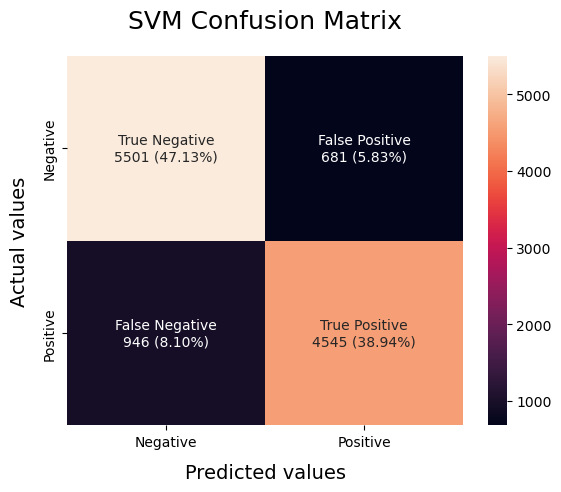

SVM  Classification Report: 
               precision    recall  f1-score   support

          No       0.85      0.89      0.87      6182
         Yes       0.87      0.83      0.85      5491

    accuracy                           0.86     11673
   macro avg       0.86      0.86      0.86     11673
weighted avg       0.86      0.86      0.86     11673



In [12]:
train_model(SVM,"SVM")

In [13]:
# with open("Depression_model.pkl", 'wb') as file:  
#     pickle.dump(SVM, file)

In [14]:
LR=LogisticRegression()

 train_acc: 0.842928 , test_acc: 0.846483


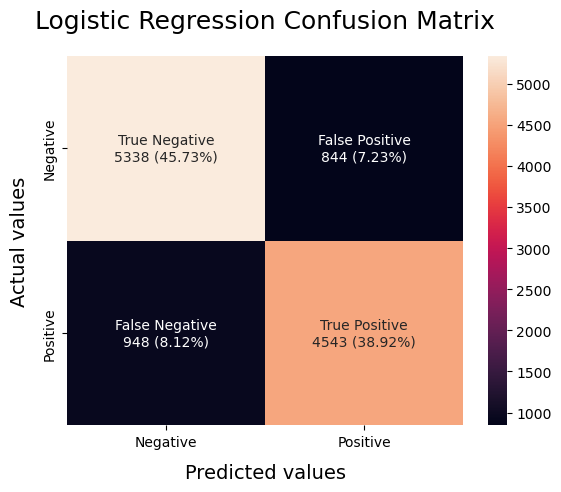

Logistic Regression  Classification Report: 
               precision    recall  f1-score   support

          No       0.85      0.86      0.86      6182
         Yes       0.84      0.83      0.84      5491

    accuracy                           0.85     11673
   macro avg       0.85      0.85      0.85     11673
weighted avg       0.85      0.85      0.85     11673



In [15]:
train_model(LR,"Logistic Regression")

In [16]:
KNN=KNeighborsClassifier()

 train_acc: 0.843112 , test_acc: 0.795511


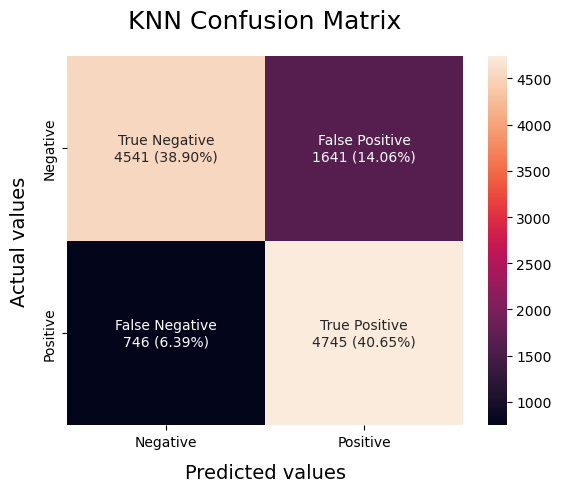

KNN  Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.73      0.79      6182
         Yes       0.74      0.86      0.80      5491

    accuracy                           0.80     11673
   macro avg       0.80      0.80      0.80     11673
weighted avg       0.80      0.80      0.80     11673



In [17]:
train_model(KNN,"KNN")

In [18]:
DT=DecisionTreeClassifier()

 train_acc: 0.998642 , test_acc: 0.726634


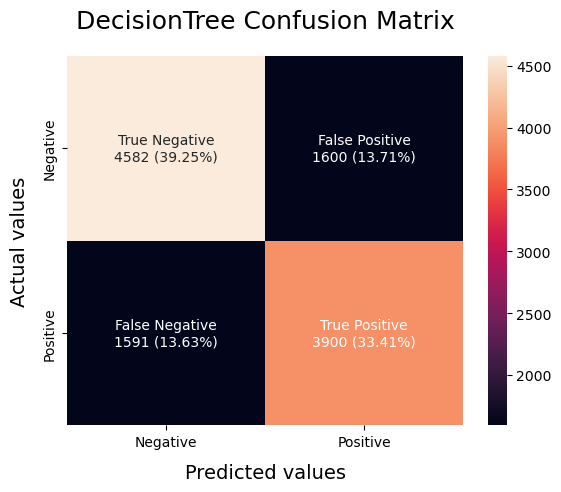

DecisionTree  Classification Report: 
               precision    recall  f1-score   support

          No       0.74      0.74      0.74      6182
         Yes       0.71      0.71      0.71      5491

    accuracy                           0.73     11673
   macro avg       0.73      0.73      0.73     11673
weighted avg       0.73      0.73      0.73     11673



In [19]:
train_model(DT,"DecisionTree")

In [20]:
RF=RandomForestClassifier()

 train_acc: 0.998642 , test_acc: 0.827551


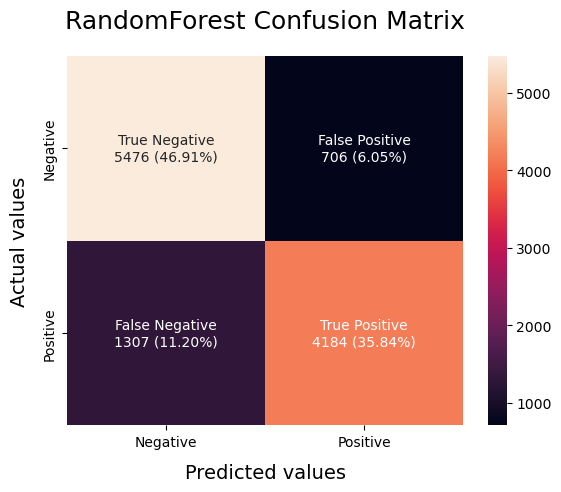

RandomForest  Classification Report: 
               precision    recall  f1-score   support

          No       0.81      0.89      0.84      6182
         Yes       0.86      0.76      0.81      5491

    accuracy                           0.83     11673
   macro avg       0.83      0.82      0.83     11673
weighted avg       0.83      0.83      0.83     11673



In [21]:
train_model(RF,"RandomForest")

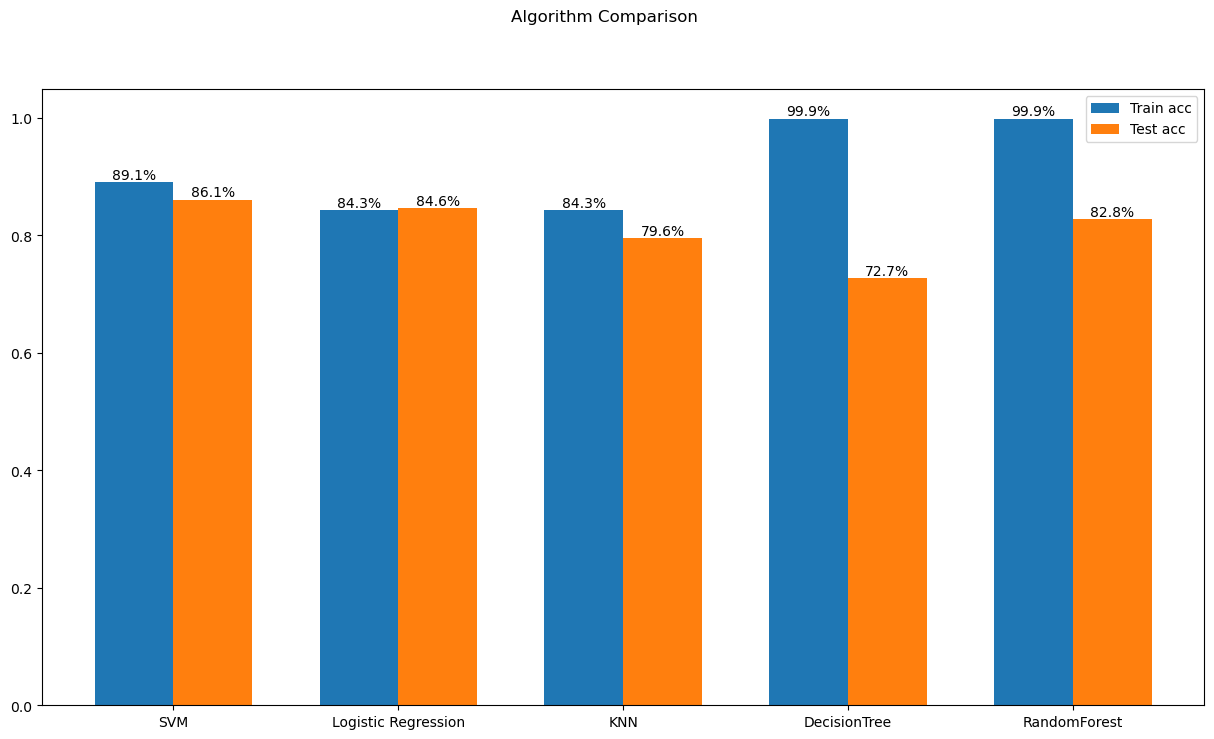

In [22]:
from matplotlib import pyplot as plt
import numpy as np

# # Example data
# names = ['Algorithm1', 'Algorithm2', 'Algorithm3']
# train_results = [0.8, 0.85, 0.9]
# test_results = [0.75, 0.8, 0.85]


fig = plt.figure()
ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

# Create bar charts
bars1 = ax.bar(ind - width/2, train_results, width=width, label='Train acc')
bars2 = ax.bar(ind + width/2, test_results, width=width, label='Test acc')

fig.set_size_inches(15, 8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)

# Annotate bars with percentage values
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height*100:.1f}%', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height*100:.1f}%', ha='center', va='bottom')

plt.show()


The best model with the highest accuracy is Support Vector Machine(SVM) with 86.1% accuracy on test dataset. Logistic Regression performed good as well but we see overfitting problem with DT and RF.

In [23]:
# with open("LR_model.pkl", 'wb') as file:  
#     pickle.dump(LR, file)